In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import SimulateData

In [5]:
config = {
    "signatures_file_path":     'cosmic_signatures/COSMIC_v3.4_SBS_GRCh37.txt',
    "signatures_to_extract":    ['SBS4', 'SBS6', 'SBS7a','SBS9','SBS18'],
    "n_samples":                100,
    "save_dir":                 'simulated_data_01_16',
    'sample_signature_distribution': {
        'distribution':             'uniform',
        'min':                      0.5,
        'max':                      2,
        'use_sign_active_prob':     True,
        'sign_active_prob':         0.4,    # Only used if use_sign_active_prob is True
        'n_sign_active':            2       # Only used if use_sign_active_prob is False
    },
    'noise_distribution': {
        'distribution':             'poisson',
        'avg_perc':                 0.05,
    },
    'counts_distribution': {
        'cancer_type':              'random', # Specify the cancer_type, or let each sample be a random one from the file 'mutation_counts/TCGA/WES_TCGA.96_min_max.csv'
        # 'cancer_type':              'NA',   # If want to not use the cancertype to get the min and max, but fill them in by hand
        'distribution':             'logscale',
        # 'min':                      1000,   # Only used if cancer_type = NA
        # 'max':                      50000,  # Only used if cancer_type = NA
    }
}

In [6]:
!ls simulated_data

config_v1.json	config_v2.json	experiment_noise_1


In [7]:
import pandas as pd
import random
import re
signatures = pd.read_csv('cosmic_signatures/COSMIC_v3.4_SBS_GRCh37.txt', sep='\t')
signatures.set_index('Type', inplace=True)
signatures = signatures[[x for x in signatures.columns if not re.search(r'SBS5$|SBS40.?$',x)]]

import numpy as np


orthogonal = dict()
for col_name, col_data in signatures.items():
    orthogonal[col_name] = 0
    for other_name, other_data in signatures.items():
        orthogonal[col_name] += np.abs(np.dot(col_data, other_data))
orthogonal = pd.Series(orthogonal).sort_values(ascending=True) #should be ascending as lower dot products are more dissimilar


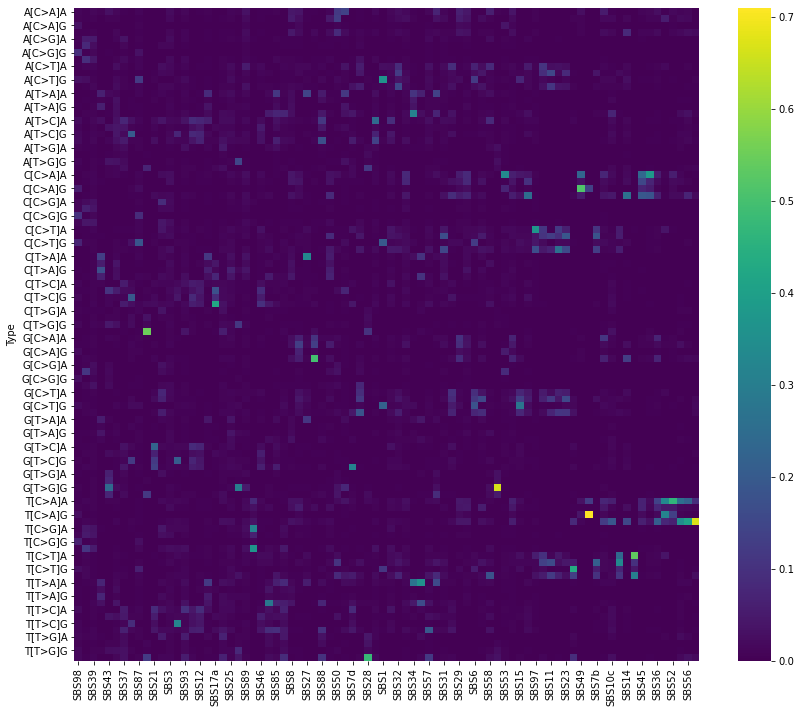

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 12))
ax = sns.heatmap(signatures[orthogonal.keys()].sort_index(), fmt=".2f", cmap="viridis")
# visual check

In [7]:
# for signature_count in [8, 15, 25]:
#     signature_list = " ".join(orthogonal[:signature_count].index)
#     for noise_level in [0.02, 0.04, 0.06]:
#         for mutation_count in [(500, 2000), (2000, 5000), (5000, 8000)]:
#             print(signature_list)
#             identifier = f"s_{signature_count}_n_{noise_level}"
#             !python SimulateData.py --identifier {identifier} --config "simulated_data/config_v1.json" --signatures_to_extract $signature_list --noise_distribution_avg_perc $noise_level --counts_distribution_min $mutation_count[0] --counts_distribution_max $mutation_count[1]
#             break

In [11]:
!mkdir simulated_data_01_16

In [12]:
config = {
  "signatures_file_path":     "cosmic_signatures/COSMIC_v3.4_SBS_GRCh37.txt",
  "signatures_to_extract":    ["SBS4", "SBS6", "SBS7a","SBS9","SBS18"],
  "n_samples":                100,
  "save_dir":                 "simulated_data_01_16",
  "sample_signature_distribution": {
      "distribution":             "uniform",
      "min":                      0.5,
      "max":                      2,
      "use_sign_active_prob":     True,
      "sign_active_prob":         0.4, 
      "n_sign_active":            2
  },
  "noise_distribution": {
      "distribution":             "poisson",
      "avg_perc":                 0.05
  },
  "counts_distribution": {
      "cancer_type":              "NA",
      "distribution":             "logscale"
  }
}

config['counts_distribution']['distribution'] = "logscale"
config['counts_distribution']['cancer_type'] = 'Thy-AdenoCa Biliary-AdenoCa Skin-Melanoma'
for signature_count in [8, 15, 25]:
    signature_list = list(orthogonal[:signature_count].index)
    config['signatures_to_extract'] = signature_list
    for noise_level in [0.02, 0.04, 0.06]:
        config['noise_distribution']['avg_perc'] = noise_level
        identifier = f"s_{signature_count}_n_{noise_level}_"
        config.update({'identifier': identifier})
        SimulateData.simulate_data(config, print_text=False)


# config['counts_distribution']['distribution'] = "logscale"
# for signature_count in [8, 15, 25]:
#     signature_list = list(orthogonal[:signature_count].index)
#     config['signatures_to_extract'] = signature_list
#     for noise_level in [0.02, 0.04, 0.06]:
#         config['noise_distribution']['avg_perc'] = noise_level
#         for cancer_type in ['Thy-AdenoCa', 'Biliary-AdenoCa', 'Skin-Melanoma']:
#             config['counts_distribution']['cancer_type'] = cancer_type
#             identifier = f"s_{signature_count}_n_{noise_level}_c_{cancer_type}"
#             config.update({'identifier': identifier})
#             SimulateData.simulate_data(config, print_text=False)

# config['counts_distribution']['cancer_type'] = "NA"
# config['counts_distribution']['distribution'] = "logscale"
# for signature_count in [8, 15, 25]:
#     signature_list = list(orthogonal[:signature_count].index)
#     config['signatures_to_extract'] = signature_list
#     for noise_level in [0.02, 0.04, 0.06]:
#         config['noise_distribution']['avg_perc'] = noise_level
#         for count_range in [(0, 3000), (3000, 6000), (6000, 9000)]:
#             config['counts_distribution']['min'] = count_range[0]
#             config['counts_distribution']['max'] = count_range[1]
#             identifier = f"s_{signature_count}_n_{noise_level}_c_{count_range[0]}_{count_range[1]}"
#             config.update({'identifier': identifier})
#             SimulateData.simulate_data(config, print_text=False)

# config['counts_distribution']['cancer_type'] = "random"
# config['counts_distribution']['distribution'] = "logscale"
# for signature_count in [8, 15, 25]:
#     signature_list = orthogonal[:signature_count].index
#     signature_list2 = list(orthogonal[:signature_count].index)
#     signature_list3 = orthogonal[:signature_count]
#     config['signatures_to_extract'] = signature_list2
#     for noise_level in [0.02, 0.04, 0.06]:
#         config['noise_distribution']['avg_perc'] = noise_level
#         identifier = f"s_{signature_count}_n_{noise_level}"
#         config.update({'identifier': identifier})
#         SimulateData.simulate_data(config, print_text=False)

In [10]:
for signature_count in [8, 15, 25]:
    signature_list = " ".join(orthogonal[:signature_count].index)
    for noise_level in [0.02, 0.04, 0.06]:
        print(signature_list)
        identifier = f"s_{signature_count}_n_{noise_level}"
        !python SimulateData.py --identifier {identifier} --config "simulated_data/config_v2.json" --signatures_to_extract $signature_list --noise_distribution_avg_perc $noise_level
        break

SBS98 SBS86 SBS39 SBS22a SBS43 SBS96 SBS37 SBS54
signatures_file_path
signatures_to_extract
False
0.02
{'counts_distribution': {'cancer_type': 'random', 'distribution': 'logscale'},
 'identifier': 's_8_n_0.02',
 'n_samples': 100,
 'noise_distribution': {'avg_perc': 0.02, 'distribution': 'poisson'},
 'sample_signature_distribution': {'distribution': 'uniform',
                                   'max': 2,
                                   'min': 0.5,
                                   'n_sign_active': 2,
                                   'sign_active_prob': 0.4,
                                   'use_sign_active_prob': False},
 'save_dir': 'simulated_data',
 'signatures_file_path': 'cosmic_signatures/COSMIC_v3.4_SBS_GRCh37.txt',
 'signatures_to_extract': ['SBS98',
                           'SBS86',
                           'SBS39',
                           'SBS22a',
                           'SBS43',
                           'SBS96',
                           'SBS37',
       

In [9]:
# Quick test
# !python SimulateData.py --identifier "352" --config "simulated_data/config_v2.json" --signatures_to_extract $signature_list --noise_distribution_avg_perc $noise_level